<a href="https://colab.research.google.com/github/seanghaeli/ising-model/blob/main/Ising_Model_Codes_2D_%26_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2D Code for Specific Heat Capacity

Text(0, 0.5, 'Ln Heat Capacity per Dipole')

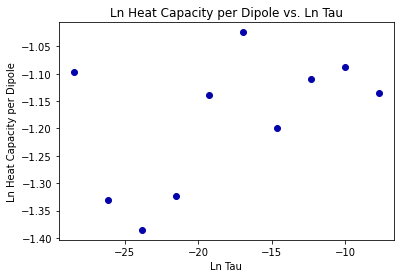

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from random import randint, random 

def deltaU(i,j,eDiff):
  if i == 1:
    top = s[size][j]
  else:
    top = s[i-1][j]
  
  if i == size:
    bottom = s[1][j]
  else:
    bottom = s[i+1][j]
  
  if j == 1:
    left = s[i][size]
  else:
    left = s[i][j-1]
  
  if j == size:
    right = s[i][1]
  else:
    right = s[i][j+1]

  return 2*s[i][j]*(top+bottom+left+right)


def localEnergy(i,j):
  if i == 1:
    top = s[size][j]
  else:
    top = s[i-1][j]
  
  if i == size:
    bottom = s[1][j]
  else:
    bottom = s[i+1][j]
  
  if j == 1:
    left = s[i][size]
  else:
    left = s[i][j-1]
  
  if j == size:
    right = s[i][1]
  else:
    right = s[i][j+1]

  return -1*s[i][j]*(top+bottom+left+right)

def totalEnergy():
  E=0
  for i in range(size+1):
    for j in range(size+1):
      E+=localEnergy(i,j)
  return E

def colorsquare(i,j):
  plt.imshow(s,interpolation='none')
  plt.show()

def initialize():
  for i in range(size+1):
    for j in range(size+1):
      if randint(0,1) == 1:
        s[i][j]= 1
      else: 
        s[i][j] = -1
        #colorsquare(i,j)

size = 8

#T= 0.7

#fig3, ax3 =plt.subplots() #comment out after finding crit temp
fig4, ax4 =plt.subplots() 
size=8
s = [[0 for i in range(size+1)] for j in range(size+1)]
initialize()
eDiff = 0; top = 0; right = 0; bottom = 0; left = 0;
etot=0;etotsq=0;
temps=[2.27+10**-3,2.27+10**-4,2.27+10**-5,2.27+10**-6,2.27+10**-7,2.27+10**-8,2.27+10**-9,2.27+10**-10,2.27+10**-11,2.27+10**-12]
for t in temps:
  T=float(t/1) #comment out after finding crit temp, and backspace all following lines
  E=0
  etot=0;etotsq=0;
  for x in range(10000*size**2): 
    if x ==1000*size**2:
      E+=totalEnergy()
    i = randint(0,size)
    j = randint(0,size)
    eDiff=deltaU(i,j,eDiff)
    if eDiff <= 0:
      s[i][j] = -s[i][j]
      if x>=(1000*size**2):
        E+=2*eDiff
      #colorsquare(i,j)
    else:
      if random() < math.exp(-eDiff/T):
        s[i][j] = -s[i][j]
        if x>=(1000*size**2):
          E+=2*eDiff
    if x%size**2==0:
      etot+=E/2.0
      etotsq+=E/2.0*E/2.0
  tau = (T-2.27)/2.27
  eAvg=etot/(((10000*size**2)-(1000*size**2)))/size**2
  eSqAvg=etotsq/(((10000*size**2)-(1000*size**2)))/size**2
  ax4.scatter(np.log(tau),np.log((eSqAvg-(eAvg**2)*size**2)/T**2/10000), color='#0504aa')
ax4.set_title("Ln Heat Capacity per Dipole vs. Ln Tau")
ax4.set_xlabel("Ln Tau")
ax4.set_ylabel("Ln Heat Capacity per Dipole")


3D Code for Specific Heat Capacity

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math
from random import randint
import random
from mpl_toolkits import mplot3d

def deltaU(i,j,k,eDiff):
  if i == 1:
    top = s[size][j][k]
  else:
    top = s[i-1][j][k]
  
  if i == size:
    bottom = s[1][j][k]
  else:
    bottom = s[i+1][j][k]
  
  if j == 1:
    left = s[i][size][k]
  else:
    left = s[i][j-1][k]
  
  if j == size:
    right = s[i][1][k]
  else:
    right = s[i][j+1][k]

  if k== 1:
    front = s[i][j][size]
  else:
    front = s[i][j][k-1]

  if k == size:
    back = s[i][j][1]
  else:
    back = s[i][j][k+1]

  return 2*s[i][j][k]*(top+bottom+left+right+front+back)

def localEnergy(i,j,k):
  if i == 1:
    top = s[size][j][k]
  else:
    top = s[i-1][j][k]
  
  if i == size:
    bottom = s[1][j][k]
  else:
    bottom = s[i+1][j][k]
  
  if j == 1:
    left = s[i][size][k]
  else:
    left = s[i][j-1][k]
  
  if j == size:
    right = s[i][1][k]
  else:
    right = s[i][j+1][k]

  if k== 1:
    front = s[i][j][size]
  else:
    front = s[i][j][k-1]

  if k == size:
    back = s[i][j][1]
  else:
    back = s[i][j][k+1]

  return -1*s[i][j][k]*(top+bottom+left+right+front+back)

def totalEnergy():
  E=0
  for i in range(size+1):
    for j in range(size+1):
      for k in range(size+1):
        E+=localEnergy(i,j,k)
  return E

def colorsquare():
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  for x in range(size+1):
    for y in range(size+1):
      for z in range(size+1):
        if s[x][y][z]==1:
          ax.scatter3D(x,y,z,c='black')
        else:
          ax.scatter3D(x,y,z,c='white')
  plt.show()
  

def initialize():
  for i in range(size+1):
    for j in range(size+1):
      for k in range(size+1):
        if randint(0,1) == 1:

          s[i][j][k]= 1
        else: 
          s[i][j][k] = -1
          #colorsquare(i,j,k)

#T= 1.5
#magnetization = list(); sum =0;
fig1, ax1 = plt.subplots()
s = [[[0 for i in range(size+1)] for j in range(size+1)] for k in range(size+1)]
initialize()
eDiff = 0; top = 0; right = 0; bottom = 0; left = 0; front = 0; back = 0;
#temps=[4.51+10**-2,4.5+10**-3,4.5+10**-4,4.5+10**-5,4.5+10**-6,4.5+10**-7,4.5+10**-8,4.5+10**-9,4.5+10**-10]
#for t in temps:
for size in range(3,12,3):
  for t in range(20,70,3):
    T=t/10
    etot=0
  
    for x in range(10000*size**3): 
      i = randint(0,size)
      j = randint(0,size)
      k = randint(0,size)
      if x==1000*size**3:
        etot+=totalEnergy()
      eDiff = deltaU(i,j,k,eDiff)
      if eDiff <= 0:
        s[i][j][k] = -s[i][j][k]
        if x>=1000*size**3:
          etot+=2*eDiff
    # colorsquare(i,j,k)
      else:
        if random.uniform(0, 1) < np.exp(-eDiff/T):
          s[i][j][k] = -s[i][j][k]
          if x>=1000*size**3:
            etot+=2*eDiff
    etot=etot/2
    eAvg=etot/((10000*size**3)-1000*size**3)/size**3
    eSqAvg=etot**2/((10000*size**3)-1000*size**3)/size**3
  #tau = (T-4.5)/4.5
  #ax1.scatter(np.log(tau),np.log((eSqAvg-(eAvg**2)*size**3)/T**2), c='#0504aa')
    if size == 3:
      ax1.scatter(T,(eSqAvg-(eAvg**2)*size**3)/T**2, c='#9467bd')
    if size == 6:
      ax1.scatter(T,(eSqAvg-(eAvg**2)*size**3)/T**2, c='#1f77b4')
    if size == 9:
      ax1.scatter(T,(eSqAvg-(eAvg**2)*size**3)/T**2, c='#ff7f0e')
    if size == 12:
      ax1.scatter(T,(eSqAvg-(eAvg**2)*size**3)/T**2, c='#126CAA')
ax1.set_title("Heat Capacity per Dipole vs. Temperature")
ax1.set_xlabel("Temperature [epsilon/k]")
ax1.set_ylabel("Heat Capacity per Dipole")